In [20]:
%matplotlib inline

In [65]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import math

In [22]:
data = pd.read_csv('ex2/ex2data1.txt', header=None)
data.columns = ['exam1_score', 'exam2_score', 'is_admitted']
data[:5]

,exam1_score,exam2_score,is_admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [50]:
admitted = data[data['is_admitted']==1]
not_admitted = data[data['is_admitted']==0]

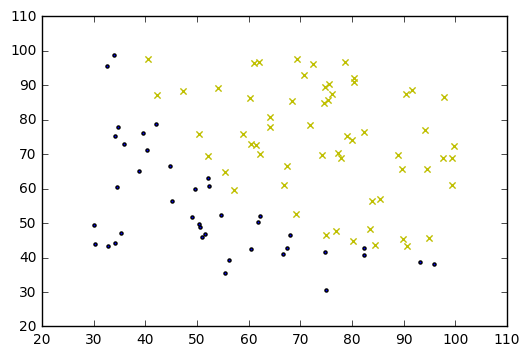

In [61]:
plot.scatter(admitted['exam1_score'], admitted['exam2_score'], c=['y'], marker='x')
plot.scatter(not_admitted['exam1_score'], not_admitted['exam2_score'], c=['b'], marker='.')

In [69]:
X = pd.DataFrame({
    'x0': np.ones(shape=(data.shape[0],)), 
    'x1': data['exam1_score'],
    'x2': data['exam2_score']}
)
X[:5]

,x0,x1,x2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


In [71]:
y = pd.DataFrame({'y': data['is_admitted']})
y[:5]

,y
0,0
1,0
2,0
3,1
4,1


In [68]:
thetha = np.zeros(shape=(3))
thetha

array([ 0.,  0.,  0.])

In [75]:
def h(X, thetha):
    return 1 / (1 + X.dot(thetha).rpow(math.e))
   
h(X, thetha)[:5]

0   -0.5
1   -0.5
2   -0.5
3   -0.5
4   -0.5
dtype: float64

In [76]:
def J(X, y, thetha, h):
    m = X.shape[0]
    h_v = h(X, thetha)
    return (-y['y'].dot(np.log(h_v)) - (1 - y['y']).dot(np.log(1 - h_v))).sum() / m

In [77]:
J(X, y, thetha, h)

0.69314718055994529

In [79]:
alpha = 0.01
iterations = 1500

In [80]:
def gradient_descent_v(X, y, thetha, alpha, iterations):
    m = X.shape[0]
    for i in xrange(iterations):
        h = X.dot(thetha)
        loss = h.sub(y['y'])
        gradient = X.transpose().dot(loss) / m
        thetha = thetha - alpha * gradient
    return thetha

In [82]:
gradient_descent_v(X, y, thetha, alpha, iterations)

x0   NaN
x1   NaN
x2   NaN
dtype: float64